In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
import datasets

In [ ]:
# acf pacf ar ma arma arima kalman fft freq resample
# https://github.com/burakbayramli/kod/tree/master/books/Introductory_Time_Series_with_R_Metcalfe

In [47]:
reload(datasets)
# ts = datasets.maine()
ts = datasets.passengers()
# ts = datasets.sunspots()
# ts = datasets.exchange()
# ts = datasets.warming()

In [20]:
pacf = sm.tsa.pacf(ts, nlags = 2)    
acf = sm.tsa.acf(ts, nlags = 60 * 60 * 24)    
print acf[:4]
print np.argsort(acf)[::-1][:10]    

[ 1.          0.82020129  0.45126849  0.03957655]
[ 0  1 10 11  9 12  2 21 22 32]


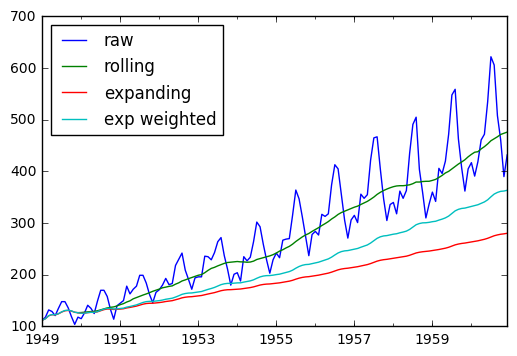

In [65]:
ts.plot(label = 'raw')
ts.rolling(12).mean().plot(label = 'rolling')
ts.expanding().mean().plot(label = 'expanding')
ts.ewm(com = 50).mean().plot(label = 'exp weighted')
plt.legend(loc ='upper left')
plt.show()

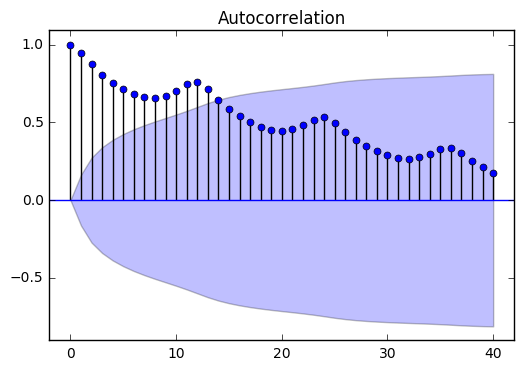

In [52]:
sm.graphics.tsa.plot_acf(ts, lags=40)
# sm.graphics.tsa.plot_pacf(ts, lags=40)
plt.show()

In [19]:
fit = sm.tsa.AR(ts).fit(3)
print fit.params
print fit.aic, fit.bic, fit.hqic

const    16.944345
L1.y      1.301721
L2.y     -0.509949
L3.y     -0.130250
dtype: float64
5.63580397958 5.69664687341 5.66013716178


In [61]:
fit = sm.tsa.ARMA(ts, (3, 3)).fit()
print fit.params
print fit.aic, fit.bic, fit.hqic

const      48.865608
ar.L1.y     2.546062
ar.L2.y    -2.441383
ar.L3.y     0.869939
ma.L1.y    -1.411675
ma.L2.y     0.431192
ma.L3.y     0.159175
dtype: float64
2575.6956449 2605.56237512 2587.63642059
